# Support Vector Machines
Experiment freely. This is a hands-on (brains off!) experience!

___

*Source: [James et al., An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) *

___

### The linearly separable case: Marginal Classifier

The *Marginal Classifier* tries finding the best separating hyperplane in a p-dimensional space.

$\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots +\beta_pX_p = 0$

Quite naively, a properly trained SVM model draws a good separating line (**boundary**) between points of different classes. Here below, the hyperplane $1+2X_1 + 3X_2 = 0$ is represented. The blue region is the set of points for which $1+2X_1 + 3X_2 > 0$, and the purple region is the set of points for which $1+2X_1 + 3X_2 < 0$ 

<img src="fig/svm_1.PNG" width="400"> 

A class separating hyperplane has the following properties

- $\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots +\beta_px_{ip} > 0$ if $y_i = 1$

- $\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots +\beta_px_{ip} > 0$ if $y_i = -1$

Therefore $f(x_i) = y_i \cdot (\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots +\beta_px_{ip}) \ge 0$


If one class-separating hyperplane exist, then infinite class-separating hyperplanes of them do exist. The objective is to find the one for which $f(x_i)$ is maximized.

<img src="fig/svm_2.PNG" width="600">

> $ \text{maximize } M \textit{  (alias: the margin)}$

> $\text{subject to }$

> $\sum_{j=1}^p{\beta_j^2} = 1,$

> $y_i \cdot (\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots +\beta_px_{ip}) \ge M$

 <img src="fig/svm_3.PNG" width="400">
 
Examining the figure above, we see that three training observations are equidistant from the maximal margin hyperplane and lie along the dashed lines indicating the width of the margin. These three observations are known as *support vectors*, since they are *vectors* in the p-dimensional space and they *support* the maximal margin hyperplane, in the sense vector that if these points were moved slightly then the maximal margin hyperplane would move as well. Interestingly, the maximal margin hyperplane directly depends on the support vectors, but **not** on the other observations! (An interesting property which will be useful later on).

### The non separable (still linear) case: Support Vector Classifier

In many cases no separating hyperplane exists, and so there is no maximal margin classifier (i.e. there not exist a solution for which $M > 0$). A generalization of the *Marginal Classifier* is called *Support Vector Classifier*. This generalization consist in allowing some points to be on the **other side** of the margin or even misclassified (i.e. on the other side of the hyperplane).

Such a  generalization ensures:
- Greater robustness to outliers
- Better classification of *most* training observation

<img src="fig/svm_4.PNG" width="600"> 

The optimization problem can be rewrited as

> $ \text{maximize } M \textit{  (alias: the margin)}$

> $\text{subject to }$

> $\sum_{j=1}^p{\beta_j^2} = 1,$

> $y_i \cdot (\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots +\beta_px_{ip}) \ge M(1 - \epsilon_i),$

> $\epsilon_i \gt 0,$

> $\sum_{i=1}^n{\epsilon_i} \le C$

where $C$ is a nonnegative tuning parameter and $\epsilon_i$ are *slack variables* that allow every individual observation fo be on the wrong side of the margin or even of the hyperplane. The larger $C$ is, the narrower will be the margins, since the cost for misclassification becomes higher, and vice versa.

The optimization problem described above has - again - a very interesting property similar to the one of *Marginal Classifiers*: it turns out that only observations that either lie on the margin or that violate the margin will affect the hyperplane, and hence the classifier obtained. In other words, an observation that lies strictly on the correct side of the margin does not affect the support vector classifier!

In general, this property allows great robustness to outliers which lie far away from the separating hyperplane.

Let's try to fit this model with **CARET**!

In [ ]:
source('src/lib.R')

In [3]:
df <- get_partitioned_df()
models <- getModelInfo()

To fit the *Linear Support Vector Classifier* model with **CARET** we'll use the **svmLinear** method (provided by the [kernlab](https://cran.r-project.org/web/packages/kernlab/index.html) package).

In [5]:
models$svmLinear$label
models$svmLinear$library

[1] "Support Vector Machines with Linear Kernel"

[1] "kernlab"

Which **svmLinear** parameters are directly supported by **CARET**?

In [6]:
models$svmLinear$parameters

parameter,class,label
C,numeric,Cost


As expected the only parameter of the model is the budge *C*. Let's try to fit this model to the *linear* dataset:

In [17]:
model <- train(
    y = df$linear$y_train$class,
    x = df$linear$x_train,
    method = "svmLinear",
    tuneGrid = data.frame('C' = 1),
    trControl = trainControl(classProbs =  TRUE)
)

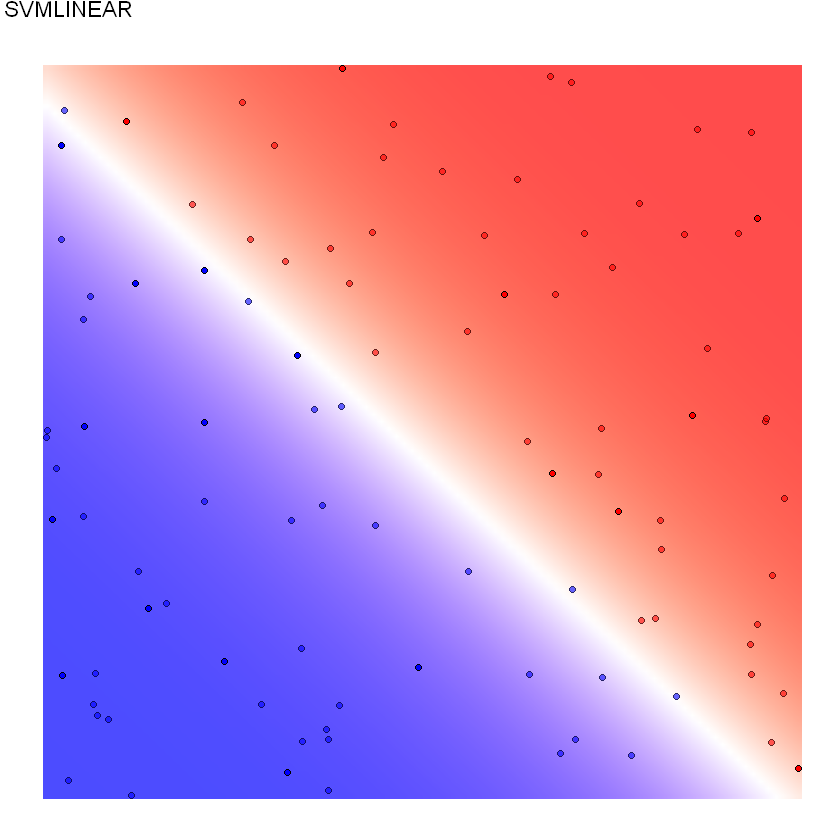

In [10]:
plot_model(df, "linear", model)

Yay! What a superbe decision boundary!

### Non-linear decision boundaries: A *nasty* problem

The *Linear Support Vector Classifier* is a natural approach for classification in the two-class setting, if the boundary between the two classes is linear. However, in practice we are sometimes faced with non-linear class boundaries, like in these cases.

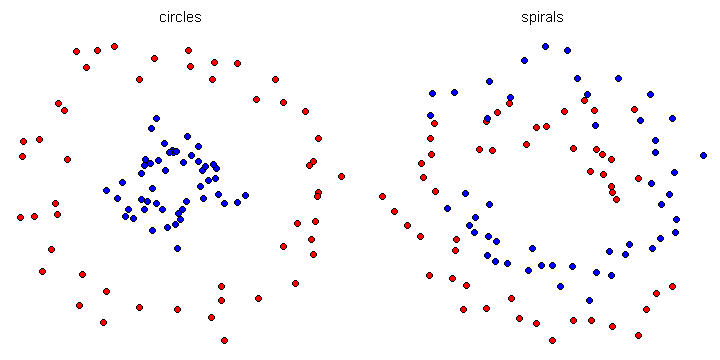

In [12]:
options(repr.plot.width=6, repr.plot.height=3)

get_full_dataset() %>%
    filter(type %in% c('spirals', 'circles')) %>%
    ggplot() + 
    geom_point(aes(x = x, y = y, fill = class), shape = 21) + 
    facet_grid(~type) + 
    theme_void() +
    labs(x = "", y = "") +
    scale_fill_manual(values = c("red", "blue")) + 
    guides(fill = F)

options(repr.plot.width=6, repr.plot.height=6)

What happens if we try to fit the *spirals* dataset using the *Linear Support Vector Classifier*? Let's try it!

In [18]:
model <- train(
    y = df$spirals$y_train$class,
    x = df$spirals$x_train,
    method = "svmLinear",
    tuneGrid = data.frame('C' = 1),
    trControl = trainControl(classProbs =  TRUE)
)

maximum number of iterations reached 0.0001285175 0.0001283303maximum number of iterations reached 0.0005690105 -0.0005688107

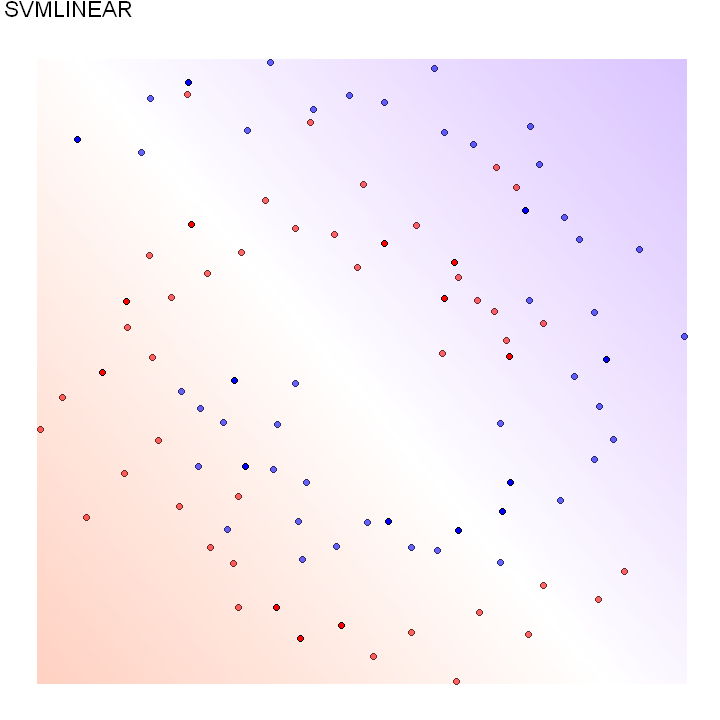

In [20]:
plot_model(df, "spirals", model)

A pretty bad result dont'ya?

We could address the problem of possibly non-linear boundaries between classes in a similar way, by enlarging the feature space using quadratic, cubic, and even higher-order
polynomial functions of the predictors. For instance, rather than fitting a
support vector classifier using p features

$ X_1, X_2, \cdots, X_p $

we could instead fit a *Support Vector Classifier* using $2p$ features 

$ X_1, X_2^2, X_2, X_1^2, \cdots, X_p, X_p^2 $

Why does this lead to a non-linear decision boundary? In the **enlarged feature space**, the decision boundary that results from the optimization problem is in fact *linear*. But in the original feature space, the decision boundary is of the form of a *nonlinear* polynomial.

One might additionally want to enlarge the feature space with higher-order polynomial terms, or with interaction terms of the form $Xj \cdot Xj$ for $j \neq j'$
. Alternatively, other functions of the predictors could be considered rather than polynomials. It is not hard to see that there are many possible ways to enlarge the feature space, and that unless we
are careful, we could end up with a huge number of features. Then computations would become unmanageable

> The *Support Vector Machine* **allows us to enlarge the feature space** used by the *Support Vector Classifier* in a way that leads to *efficient* computations

### Support Vector Machine

We got there, eventually!!!

The *Support Vector Machine* is an extension fo the support vector classifiers, that results from enlarging the feature space in a specific way, using **kernels**.

> It turns out that the solution of the *Support Vector Classifier* problem (*see above*) **involves only the inner product of the observation** (instead of the observation themselves)

Remember that the product of two observation $x_i$ and $x_{i'}$ in a p-dimensional space is given by:

$\langle x_i, x_{i'} \rangle = \sum_{j=1}^p{x_{ij} \cdot x_{i'j}}$

It can be shown that a  *Linear Support Vector Classifier* can be represented as

$f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i \langle x_i, x \rangle$

where there are $n$ parameters $\alpha_i$, one per training data.

To estimate the parameters $\alpha_i,$ $i = 1, \cdots, n $ **all we need** are the $\binom{n}{2}$ inner products between all pairs of training observations.

@TODO Meglio togliere questo pezzo finale
The solution to the maximum margin hyperplane problem is a **sparse** vector $\alpha$, which is nonzero only for the support vectors in the solution! (Do you recall now the nice property we mentioned right above?)

#### Kernel Trick

Now, if we replace the inner product with a generalization of the inner product (i.e. a **kernel**), 

> $K(x_i, x_{i'})$

we end up with a powerful algorithm which returns the optimal class separating hyperplane in a arbitrarily large hyperspace whose computational requirements is **solely** dependent by the square of number of training obervation - $\binom{n}{2}$ - but ** it is not affected ** by the size of the hyperspace!!!

This is important because in many applications of SVMs, the enlarged feature space is so large that computations are intractable. 


@TODO togliere questo pezzo finale?
For some kernels, such as the radial kernel that we will se later, the feature space is implicit and infinite-dimensional, so we could never do the computations there anyway!

___
For instance, lets consider the following kernel
$K(x_i, x_{i'}) = (1 + \delta \sum_{j=1}^{p}(x_i \cdot  x_{i'}))^d $

This is know as **polynomial kernel** with a scaling parameter equal to $\delta$. Using such a kernel with d > 1, instead of the standard linear kernel ($K(x_i, x_{i'}) =  \sum_{j=1}^{p}x_{ij} \cdot x_{i'j}$), in the support vector classifier algorithm leads to a much more flexible decision boundary. **It essentially equals to fitting a support vector classifier in a higher-dimensional space involving polynomials of degree d**, rather than in the original feature space.

<img src="fig/kernel_trick.jpg" width="2000"> 

Basically, from the situation in the first plot, we define the nonlinear boundary in the third plot  without explicitely computing the transformation $\varphi$ of which in the second plot!

To fit the a *SVM* model with *polynomial kernel* using **CARET** we'll use the **svmPoly** method (provided by the [kernlab](https://cran.r-project.org/web/packages/kernlab/index.html) package).

In [23]:
models$svmPoly$label
models$svmPoly$library

[1] "Support Vector Machines with Polynomial Kernel"

[1] "kernlab"

In [24]:
models$svmPoly$parameters

parameter,class,label
degree,numeric,Polynomial Degree
scale,numeric,Scale
C,numeric,Cost


As specified by the [reference manual](https://cran.r-project.org/web/packages/kernlab/kernlab.pdf).

- *degree* is the **order** of the polynomial transformation

- *scale* is the $\delta$ **scaling** parameter affecting the kernel function

- *C* is the **cost** parameter: the higher it is, the lower is the tolerance for points on the wrong side of the separating hyperplane. Remember hard/soft margins?
___

In [34]:
## set the hyperparameters

degree = 1
scale = 1
cost = 1

hyperparameters = data.frame(degree = 1,
                             scale = 1,
                             C = 1)

In [27]:
model <- train(
    y = df$spirals$y_train$class,
    x = df$spirals$x_train,
    method = "svmPoly",
    tuneGrid = data.frame(
        degree = 1,
        scale = 1,
        C = 1
    ),
    trControl = trainControl(
        classProbs =  TRUE
    )
)

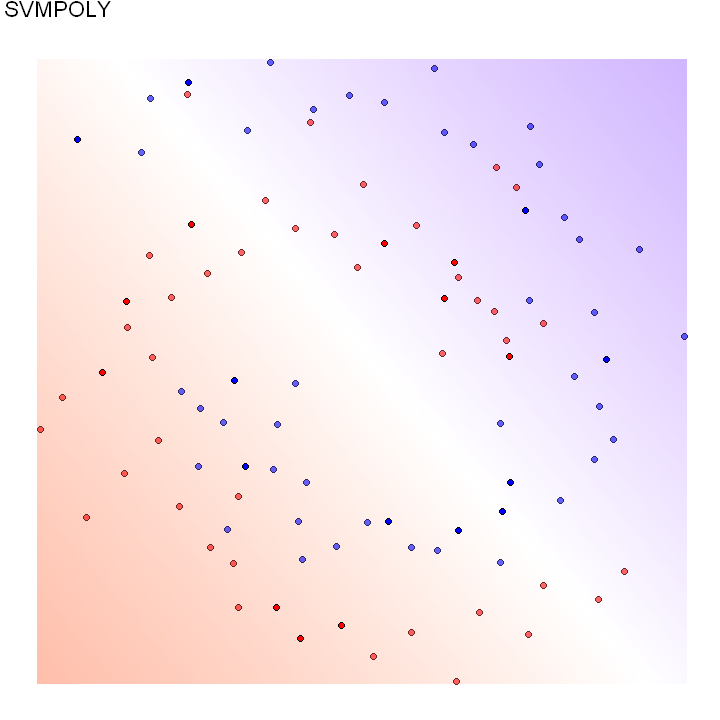

In [28]:
plot_model(df, "spirals", model)

Pretty bad, don't you think? This is because we imposed a 1-degree polynomial kernel (which is actually a linear kernel, while the data are clearly not linearly separable). With this approach, the SVM degenerates to a simpler Support Vector *Classifier*, which ofc is much less powerful as it does not explore higher dimensional spaces to find the separating hyperplane. 

___

### Tweaking SVM Hyperparameters

Let's profit of the *kernel trick* and try changing some hyperparatemers.

In [29]:
model <- train(
    y = df$spirals$y_train$class,
    x = df$spirals$x_train,
    method = "svmPoly",
    tuneGrid = data.frame(
        degree = 3,
        scale = 1,
        C = 1
    ),
    trControl = trainControl(
        classProbs =  TRUE
    )
)

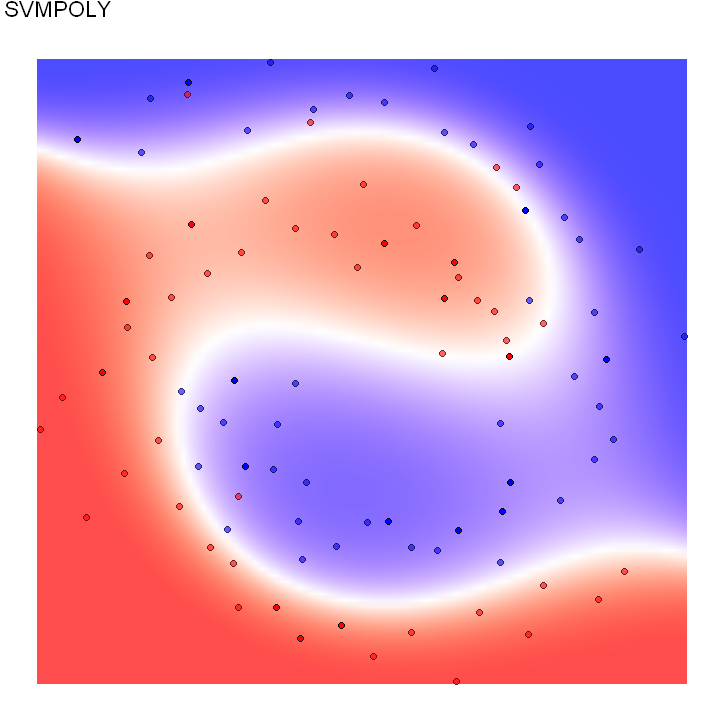

In [31]:
plot_model(df, "spirals", model)

Wow!!!

@TODO
Da qua toglierei
___________

## I still don't understand... how is this magic possible?

Let's keep it simple: we need **geometrical transformation $\varphi$** of the datapoints which could "raise" the points belonging to one class and vice versa.

Mmm let me think.. Maybe something like these?

<img src="fig/droplet.jpg" width="400"> <img src="fig/gravitational_wawes.jpeg" width="425"> 

Yes, exactly!

Oh, now I get it, this looks like a sin wave.. now i just have to **slice through** the waves and I have my class-separating hyperplane!

___

But look at the Taylor expansion of 2d sine and cosine..

$ \begin{eqnarray*}
\sin x &=& \sum^{\infty}_{n=0} \frac{(-1)^n}{(2n+1)!} x^{2n+1}\quad =  x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots \\
\cos x &=& \sum^{\infty}_{n=0} \frac{(-1)^n}{(2n)!} x^{2n}\quad =  1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
\end{eqnarray*} $

Those powers looks quite frightening and are a huge computational burden. Also, we would need to explicitely define the equation of $\varphi$ ourselves.. this is why the *kernel trick* is so useful!

>- we do not have to explicit any transformation function $\varphi$ but only to compute $K(x_i,x_{i'})$ for all $\binom{n}{2}$ for all distinct pairs $i, i'$
>- we do not even have to actually compute such a coordinates transformation, 
    - because, as we said, we are not interested much in the transformed data, rather into the class-separating hyperplane, and the *kernel trick* takes care of maximizing the difference between **support vectors** from the separating hyperplane! This is a beast,  this is a **machine**!
    
___

Always remember not to exagerate with tweaks...

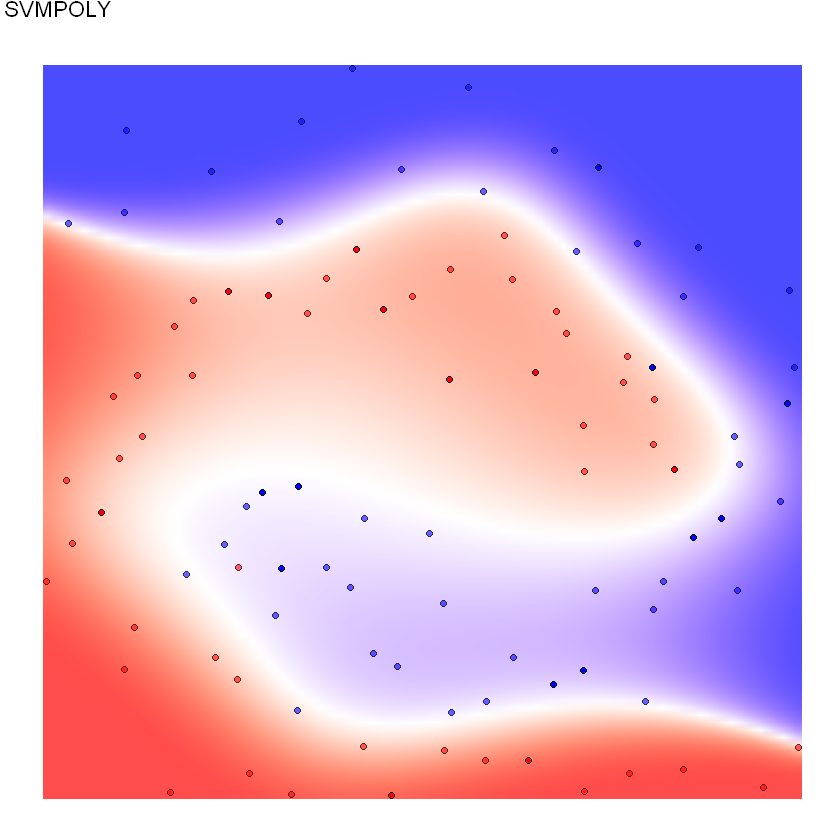

In [12]:
## set the hyperparameters

degree = 5
scale = 1
cost = 5

hyperparameters = data.frame('degree' = degree,
                             'scale' = scale,
                             'C' = cost)

## train the model

model = train(y = df[[data_name]]$y_train$class,
           x = df[[data_name]]$x_train,
           method = algorithm,
           tuneGrid = hyperparameters,
           trControl = trainControl(method = 'boot',
                                    classProbs =  TRUE)
           )

plot_model(df, data_name, model)

This looks like quite a bit overfit...

___
@TODO Fino a qua alla fine non abbiamo ancora parlato di overfit

Now let's consider another type of kernel, the **radial kernel**:

$K(x_i, x_{i'}) = \exp\big(-\gamma \sum_{j=1}^{p}(x_{ij}-x_{i'j})^2\big)$

where $\gamma = \frac{1}{\sqrt{2\sigma}}$ is the *scale* parameter, which set the speed of the exponential decay

How does the radial kernel actually work? If a given test observation $ x^{test} = [x_1^{test}
\cdots x_p^{test}] $ is far from a training observation $x_i$ in terms of Euclidean distance, then $\sum_{j=1}^p(x_{ij}-x_{j}^{test})^2$ will be large, and so $K(x_i, x_{i'}) = \exp\big(-\gamma \sum_{j=1}^{p}(x_{ij}-x_{j}^{test})^2\big)$ wil be very tiny, and vice versa.

In other words, training observations that are far from $x^{test}$ will play essentially no role in
the predicted class label for $x^{test}$. This means that the radial kernel has very local behavior, in the sense that only nearby training observations have an effect on the class label of a test observation.

To fit the a *SVM* model with *radial kernel* using **CARET** we'll use the **svmRadial** method (provided by the [kernlab](https://cran.r-project.org/web/packages/kernlab/index.html) package).

In [32]:
models$svmRadial$label
models$svmRadial$library

[1] "Support Vector Machines with Radial Basis Function Kernel"

[1] "kernlab"

That supports the following parameters:

In [33]:
models$svmRadial$parameters

parameter,class,label
sigma,numeric,Sigma
C,numeric,Cost


Cost has the same interpretation as of the other *Support Vector* models (see above).

In [39]:
model = train(
    y = df$spirals$y_train$class,
    x = df$spirals$x_train,
    method = "svmRadial",
    trControl = trainControl(classProbs =  TRUE)
)

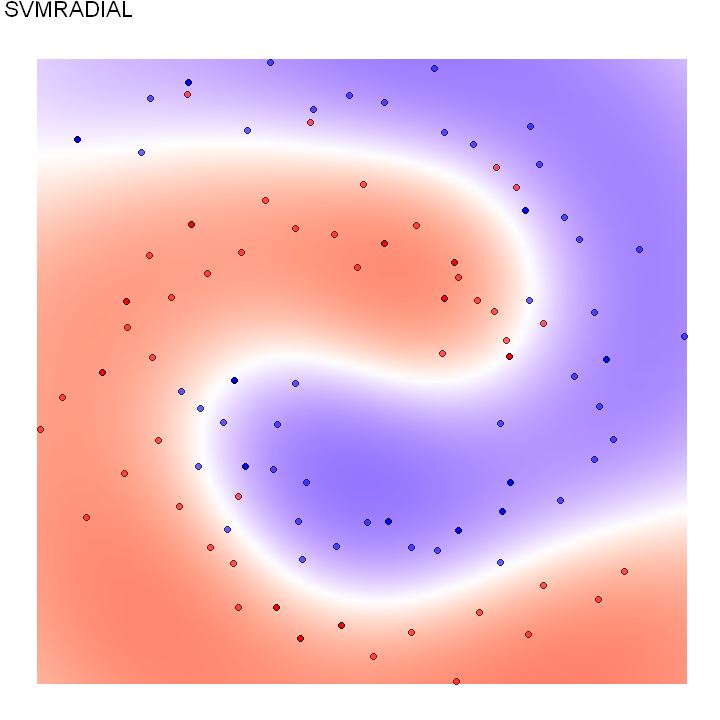

In [40]:
plot_model(df, "spirals", model)